In [1]:
import networkx as nx
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from node2vec import Node2Vec

In [2]:
G= nx.read_gml('lesmiserables.gml',label='id') #reading the input graph  

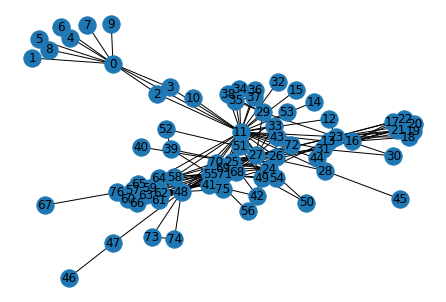

In [3]:
nx.draw(G, with_labels=True,) # drawing the graph
plt.show()

In [4]:
df_edges=nx.to_pandas_edgelist(G)  #creating an edge list data frame
df_edges

,source,target,value
0,0,1,1
1,0,2,8
2,0,3,10
3,0,4,1
4,0,5,1
...,...,...,...
249,69,75,3
250,70,71,2
251,70,75,1
252,71,75,1


In [5]:
node2vec = Node2Vec(G, dimensions=16, walk_length=30, num_walks=200, workers=4,q=2)  #  Precompute probabilities and generate walks

Computing transition probabilities: 100%|██████████| 77/77 [00:00<00:00, 697.81it/s]


In [6]:
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # embed nodes

In [7]:
model.wv.save_word2vec_format('./lesmis.emb')

In [8]:
lesmiserables_df= pd.read_csv('lesmis.emb',sep=' ',skiprows=[0],header=None) # creating a dataframe from the embedded graph 
lesmiserables_df.set_index(0,inplace=True)
lesmiserables_df.index.name='node_id'
lesmiserables_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
node_id,,,,,,,,,,,,,,,,
11,-0.226214,1.091074,0.985694,-0.830538,0.157554,-1.250656,-0.486611,3.300311,0.085117,1.832896,-0.199452,0.533265,1.348468,0.869910,-1.442859,0.064884
48,-0.294096,-0.031318,-1.037733,-2.503699,1.449169,-0.745782,-0.519533,-0.768033,1.330160,-1.346102,-0.627029,0.127735,0.027297,-0.887928,1.936895,1.238666
55,-0.055402,-1.468114,0.947032,0.996097,1.281910,0.826091,-2.367651,-3.281893,1.310241,-0.872431,-0.749102,1.161484,0.468346,0.066198,-0.529553,-0.474550
27,-1.676381,0.919987,-1.089309,-0.130899,-1.443565,-0.004719,-0.191248,2.127013,-0.374153,-0.986158,2.524394,0.557330,2.080948,-0.646981,0.090024,0.613326
0,3.745324,1.425055,1.339826,0.591460,-2.544881,0.725665,-2.655075,1.628135,-3.557102,3.711554,0.199721,-0.929251,-1.190330,1.796754,0.692799,1.102736


In [14]:
NUM_CLUSTERS = 3                           # running Machine learning cluster algorithm(Kmeans) on the embedded graph
km = KMeans(n_clusters=NUM_CLUSTERS)
labels = km.fit_predict(lesmiserables_df)
lesmiserables_df['cluster']=labels

In [15]:
clusters_df = lesmiserables_df.reset_index()[['node_id','cluster']]  #creating a cluster data frame that contains cluster id for each node
clusters_df

,node_id,cluster
0,11,2
1,48,0
2,55,0
3,27,2
4,0,1
...,...,...
72,15,2
73,45,2
74,53,2
75,40,2


In [16]:
labels=dict(G.nodes.data())          #creating a dictionary to bind node id to its label
names=[]
for item in list(labels.values()):
    names.append(item['label'])

In [17]:
id_names_dict = {key: value for key, value in zip(range(len(G.nodes)), names)}

In [18]:
with open('lesmiserables1.gdf', 'w') as f:                        # prepare the output graph to be read by the Gephi tool 
    f.write('nodedef>name VARCHAR,cluster_id VARCHAR,label VARCHAR\n')
    for index, row in clusters_df.iterrows():
        f.write('{},{},{}\n'.format(row['node_id'], row['cluster'],id_names_dict[row[0]]))
    f.write('edgedef>node1 VARCHAR,node2 VARCHAR,weight VARCHAR\n')
    for index, row in df_edges.iterrows(): 
        f.write('{},{},{}\n'.format(row['source'], row['target'],row['value']))